In this post, we're going to look at the explanatory features in the dataset. 

First, let's load all the modules we'll need.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.pylab.rcParams['figure.figsize'] = (10, 6)

Next, let's get our dataset and variables.

In [20]:
data=pd.read_pickle("/home/soumya/research/insight/insight_project/modeling/data/dsm_data_scoped_variables.pkl")

In [21]:
variables=[]
with open("/home/soumya/research/insight/insight_project/modeling/code/dsm_exog_.txt","r") as f:
    lines=f.readlines()
    for line in lines:
        variables.append(line.strip().upper())
for variable in variables:
    print(variable)

AGE_AS_OF_12/31/13_(EDITED/IMPUTED)
SEX
RACE/ETHNICITY_(EDITED/IMPUTED)
MARITAL_STATUS-12/31/13_(EDITED/IMPUTED)
FAMILY'S_TOTAL_INCOME
ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3
HIGH_BLOOD_PRESSURE_DIAG_(>17)
CORONARY_HRT_DISEASE_DIAG_(>17)
AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE
MULT_DIAG_HIGH_BLOOD_PRESS_(>17)
AGE_OF_DIAGNOSIS-CORONARY_HEART_DISEASE
ANGINA_DIAGNOSIS_(>17)
AGE_OF_DIAGNOSIS-ANGINA
HEART_ATTACK_(MI)_DIAG_(>17)
AGE_OF_DIAGNOSIS-HEART_ATTACK(MI)
OTHER_HEART_DISEASE_DIAG_(>17)
AGE_OF_DIAGNOSIS-OTHER_HEART_DISEASE
STROKE_DIAGNOSIS_(>17)
AGE_OF_DIAGNOSIS-STROKE
EMPHYSEMA_DIAGNOSIS_(>17)
AGE_OF_DIAGNOSIS-EMPHYSEMA
CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R3/1
CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R5/3
HIGH_CHOLESTEROL_DIAGNOSIS_(>17)
AGE_OF_DIAGNOSIS-HIGH_CHOLESTEROL
CANCER_DIAGNOSIS_(>17)
CANCER_DIAGNOSED_-_BLADDER_(>17)
CANCER_DIAGNOSED_-_BREAST_(>17)
CANCER_DIAGNOSED_-_CERVIX_(>17)
CANCER_DIAGNOSED_-_COLON_(>17)
CANCER_DIAGNOSED_-_LUNG_(>17)
CANCER_DIAGNOSED_-_LYMPHOMA_(>17)
CANCER_DIAGNO

In [22]:
interpretation={}
interpretation["categorical"]={
                1: "Yes",
                2: "No",
                -1: "Inapplicable",
                -2: "Determined in previous round",
                -7: "Refused",
                -8: "Don't know",
                -9: "Not ascertained",
                -10: "HOURLY WAGE >= $76.96",
                -13: "INITIAL WAGE IMPUTED"
                }
interpretation["RACE/ETHNICITY_(EDITED/IMPUTED)"]={1: "HISPANIC",
                        2: "NON-HISPANIC WHITE ONLY",
                        3: "NON-HISPANIC BLACK ONLY",
                        4: "NON-HISPANIC ASIAN ONLY",
                        5: "NON-HISPANIC OTHER RACE OR MULTIPLE RACE"
                        }
interpretation["SEX"]={1: "MALE", 2: "FEMALE"}
interpretation["MARITAL_STATUS-12/31/13_(EDITED/IMPUTED)"]={-9: "NOT ASCERTAINED",
                           -8: "DK",
                           -7: "REFUSED",
                           1: "MARRIED",
                           2: "WIDOWED",
                           3: "DIVORCED",
                           4: "SEPARATED",
                           5: "NEVER MARRIED",
                           6: "UNDER 16 - INAPPLICABLE"
                          }
interpretation["EDUCATION_RECODE_(EDITED)"]={-9: "NOT ASCERTAINED",
                             -8: "DK",
                             -7: "REFUSED",
                             -1: "INAPPLICABLE OR UNDER 5",
                             1: "LESS THAN/EQUAL TO 8TH GRADE",
                             2: "9 - 12TH GRADE, NO HS DIPLOMA OR GED",
                             13: "GED OR HS GRAD",
                             14: "BEYOND HS,COLLEGE(NO 4YR DEG),ASSOC DEG",
                             15: "4-YEAR COLLEGE DEGREE, BACHELOR'S DEGREE",
                             16: "MASTER'S, DOCTORATE, OR PROFESSIONAL DEG"
                             }
interpretation["INDUSTRY_GROUP_RD_3/1_CMJ"]={-9: "NOT ASCERTAINED",
                            -1: "INAPPLICABLE",
                            1: "NATURAL RESOURCES",
                            2: "MINING",
                            3: "CONSTRUCTION",
                            4: "MANUFACTURING",
                            5: "WHOLESALE AND RETAIL TRADE",
                            6: "TRANSPORTATION AND UTILITIES",
                            7: "INFORMATION",
                            8: "FINANCIAL ACTIVITIES",
                            9: "PROFESSIONAL AND BUSINESS SERVICES",
                            10: "EDUCATION, HEALTH, AND SOCIAL SERVICES",
                            11: "LEISURE AND HOSPITALITY",
                            12: "OTHER SERVICES",
                            13: "PUBLIC ADMINISTRATION",
                            14: "MILITARY",
                            15: "UNCLASSIFIABLE INDUSTRY"}
interpretation["OCCUPATION_GROUP_RD_3/1_CMJ"]={
    -9: "NOT ASCERTAINED",
    -1: "INAPPLICABLE",
    1: "MANAGEMENT, BUSINESS, AND FINANCIAL OPER",
    2: "PROFESSIONAL AND RELATED OCCUPATIONS", 
    3: "SERVICE OCCUPATIONS",
    4: "SALES AND RELATED OCCUPATIONS", 
    5: "OFFICE AND ADMINISTRATIVE SUPPORT",
    6: "FARMING, FISHING, AND FORESTRY",
    7: "CONSTRUCTION, EXTRACTION, AND MAINTENANC",
    8: "PRODUCTION, TRNSPORTATION, MATRL MOVING", 
    9: "MILITARY SPECIFIC OCCUPATIONS",
    11: "UNCLASSIFIABLE OCCUPATION"}
interpretation["CENSUS_REGION_AS_OF_12/31/13"]={-1: "Inapplicable",
                                                1:"Northeast",
                                                2:"Midwest",
                                                3:"South",
                                                4:"West"}
interpretation["EMPLOYMENT_STATUS_RD_3/1"]={-9: "NOT ASCERTAINED",
                                            -8: "DK",
                                            -7: "REFUSED",
                                            -1: "INAPPLICABLE",
                                            1: "EMPLOYED AT RD 3/1 INT DATE",
                                            2: "JOB TO RETURN TO AT RD 3/1 INT DATE",
                                            3: "JOB DURING RD 3/1 REF PERIOD",
                                            4: "NOT EMPLOYED DURING RD 3/1"}

interpretation["FULL_YEAR_INSURANCE_COVERAGE_STATUS_2013"]={
     1: "<65 ANY PRIVATE",
     2: "<65 PUBLIC ONLY",
     3: "<65 UNINSURED",
     4: "65+ EDITED MEDICARE ONLY",
     5: "65+ EDITED MEDICARE AND PRIVATE",
     6: "65+ EDITED MEDICARE AND OTH PUB ONLY",
     7: "65+ UNINSURED",
     8: "65+ NO MEDICARE AND ANY PUBLIC/PRIVATE"
    }



In [23]:
def interpret(feature,level):
    if feature in interpretation:
        return interpretation[feature][level]
    elif len(data[feature].value_counts())<50:
        if level in interpretation["categorical"]:
            return interpretation["categorical"][level]
        else:
            return level
    else:
        return level

In [24]:
def interpret_vectorized(data,feature):
    if feature in interpretation:
        return data[feature].map(lambda x: interpretation[feature][x])
    elif feature in categorical:
        return data[feature].map(lambda x: interpretation["categorical"][x])
    else:
        return data[feature]

Here I'm going to prototype a function that will spit out the empirical distributions of each of the explanatory variables, taking as parameter the variable position in the list data.columns .

I'm going to have to treat categorical variables differently to continuous variables, so I'd like to split them out into two groups. I've done this by hand in a text editor, and I'll just read the lists in here:

One rough and ready way to break out the categorical variables is to check how many levels that feature has in the dataset - if there are relatively few (say below a threshold of 10 or 20), I'll assume the feature is categorical, and otherwise I'll assume it's continuous. To deal with some of the edge cases, it's easy to note that anything involving an age, or a # of visits should be continuous.

Let's see if this works.

In [25]:
def check_discrete(data,thevariable):
    if len(data[thevariable].unique())>19 or "AGE" in thevariable or "#" in thevariable:
        return "continuous"
    else:
        return "categorical"

Let's see if this gave us what we wanted.

In [26]:
print("Continuous features\n\n")
continuous=[term for term in variables if check_discrete(data,term)=="continuous"]
for term in continuous:
    print(term)
print("\n\n\n")
print("Categorical features\n\n")
categorical=[term for term in variables if check_discrete(data,term)=="categorical"]
for term in categorical:
    print(term)

Continuous features


AGE_AS_OF_12/31/13_(EDITED/IMPUTED)
FAMILY'S_TOTAL_INCOME
ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3
AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE
AGE_OF_DIAGNOSIS-CORONARY_HEART_DISEASE
AGE_OF_DIAGNOSIS-ANGINA
AGE_OF_DIAGNOSIS-HEART_ATTACK(MI)
AGE_OF_DIAGNOSIS-OTHER_HEART_DISEASE
AGE_OF_DIAGNOSIS-STROKE
AGE_OF_DIAGNOSIS-EMPHYSEMA
AGE_OF_DIAGNOSIS-HIGH_CHOLESTEROL
AGE_OF_DIAGNOSIS-DIABETES
AGE_OF_DIAGNOSIS-ARTHRITIS
AGE_OF_DIAGNOSIS-ASTHMA
AGE_OF_DIAGNOSIS-ADHD/ADD
FULL_YEAR_INSURANCE_COVERAGE_STATUS_2013
#_WKS/MON_WOUT_HLTH_INS_PRV_YR-PN_18_ONL
ANY_TIME_COVERAGE_BY_STATE_INS_-_R3/1
#_OFFICE-BASED_PROVIDER_VISITS_13
#_OUTPATIENT_DEPT_PROVIDER_VISITS_13
#_EMERGENCY_ROOM_VISITS_13
#_NIGHTS_IN_HOSP_FOR_DISCHARGES_2013
FINAL_PERSON_WEIGHT_2013
TOTAL_OFFICE-BASED_EXP_13
TOTAL_OUTPATIENT_PROVIDER_EXP_13
TOT_HOSP_IP_FACILITY_+_DR_EXP_13
TOTAL_ER_FACILITY_+_DR_EXP_13




Categorical features


SEX
RACE/ETHNICITY_(EDITED/IMPUTED)
MARITAL_STATUS-12/31/13_(EDITED/IMPUTED)
HIGH_BLOOD_PRESSU

Pretty good!

In [27]:
def explore(position):
    term=data.columns[position]
    #print(data[term])
    print(term)
    #kind=input()
    if term in categorical:
        temp=interpret_vectorized(data,term)
        #data[term].map(lambda x: interpret(term,x))
        temp.value_counts().plot(kind="bar",title=term)
    else:
        bins=sorted(data[term].unique())
        data[term].plot(kind="hist",bins=bins,title=var,xticks=range(min(bins),max(bins),5))
    plt.show()

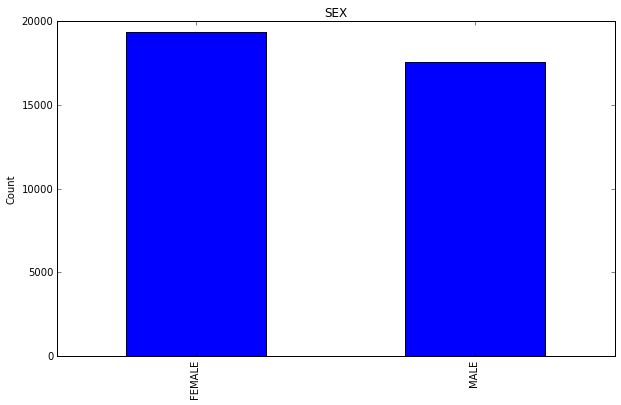

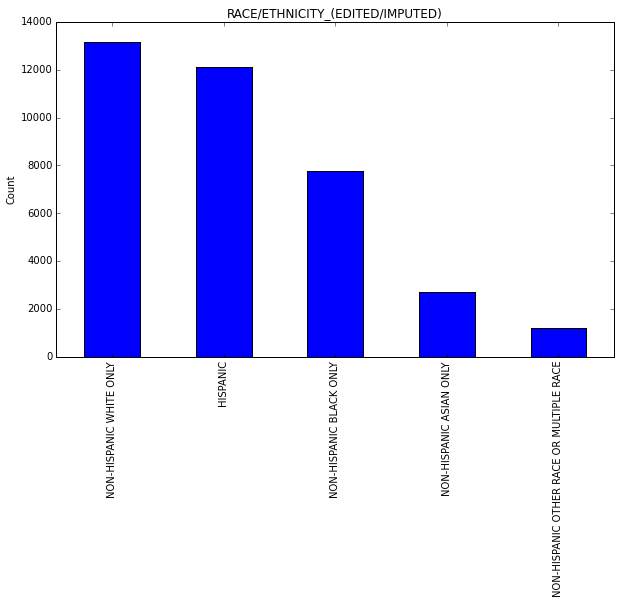

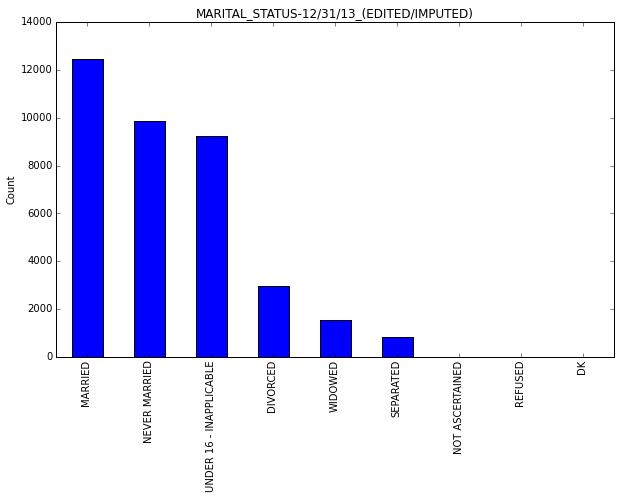

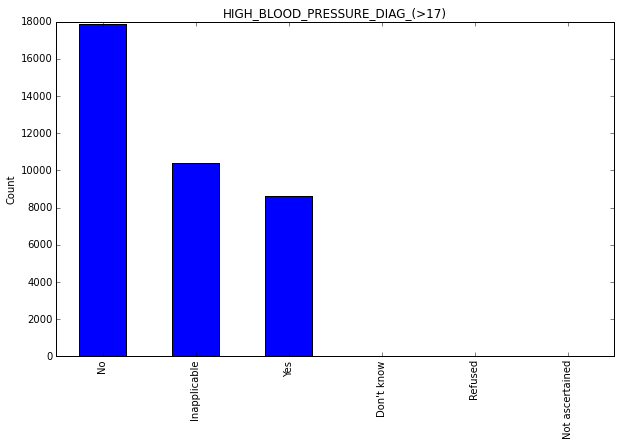

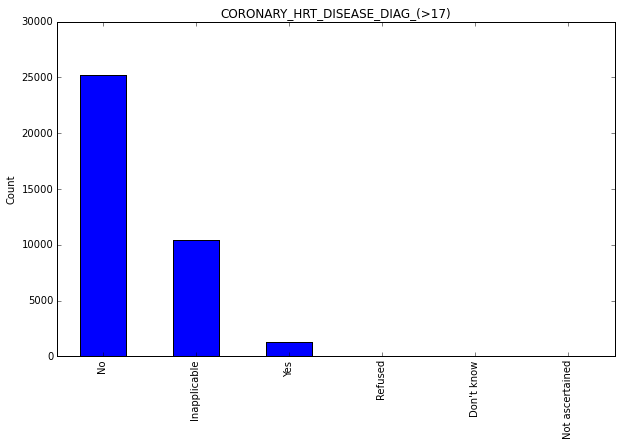

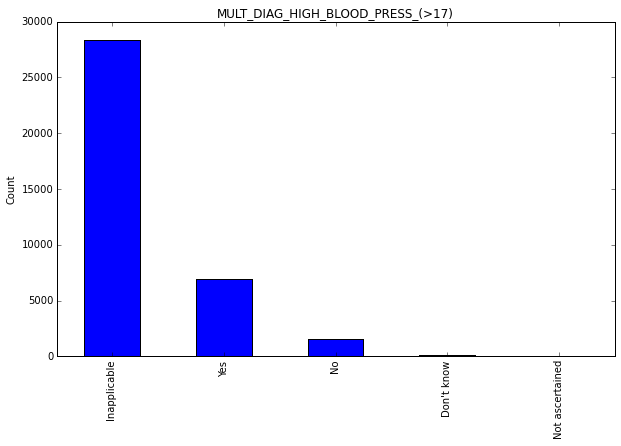

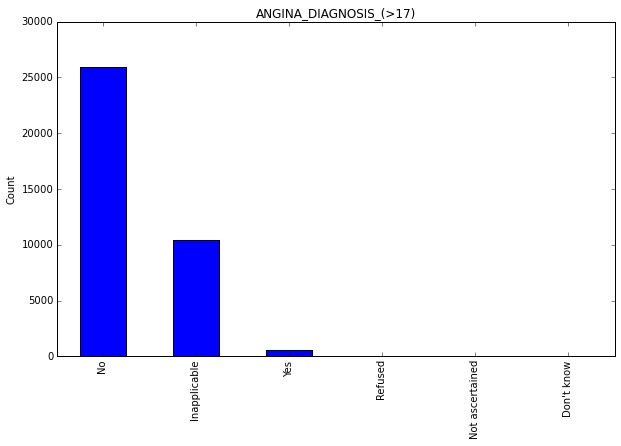

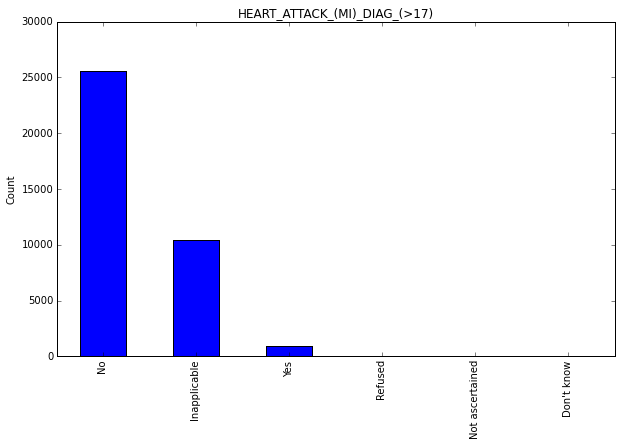

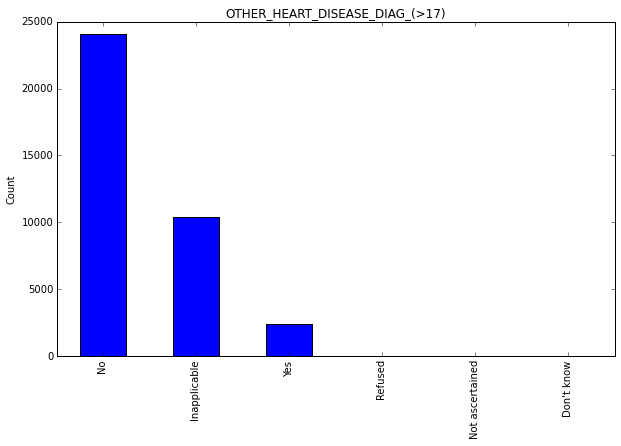

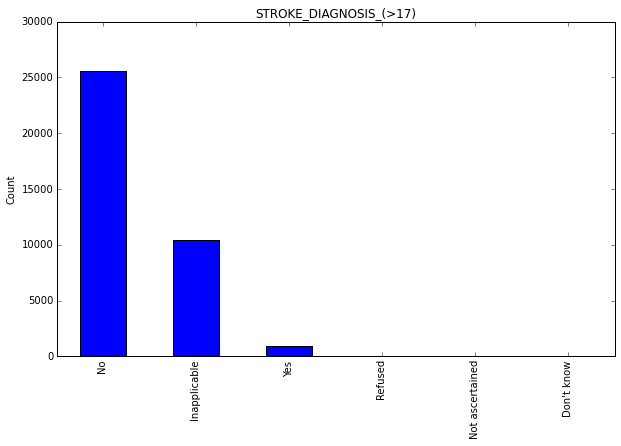

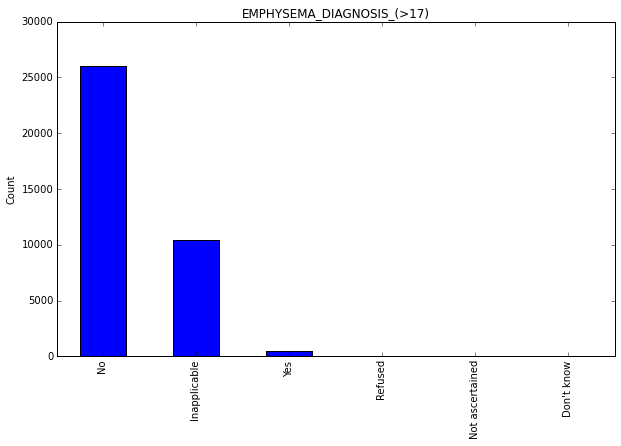

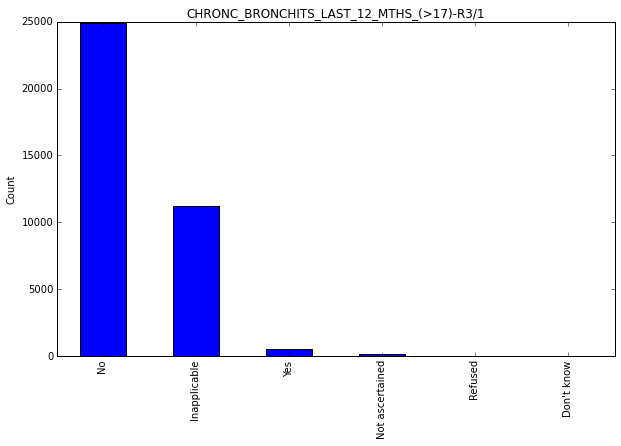

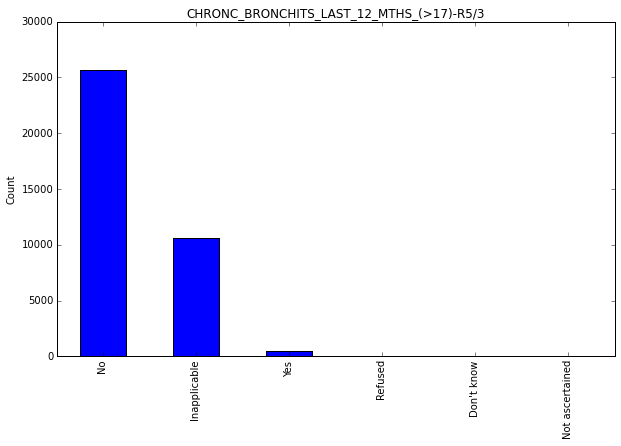

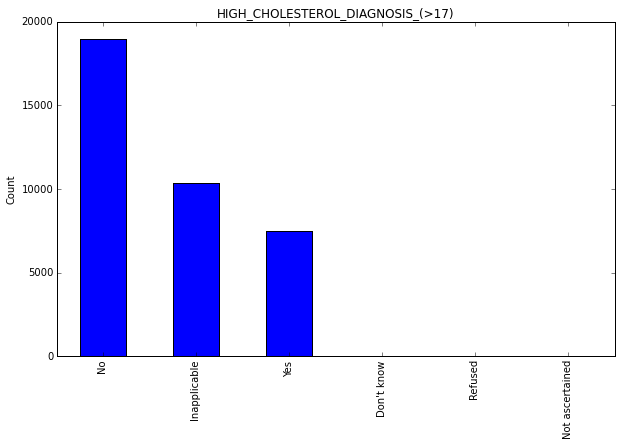

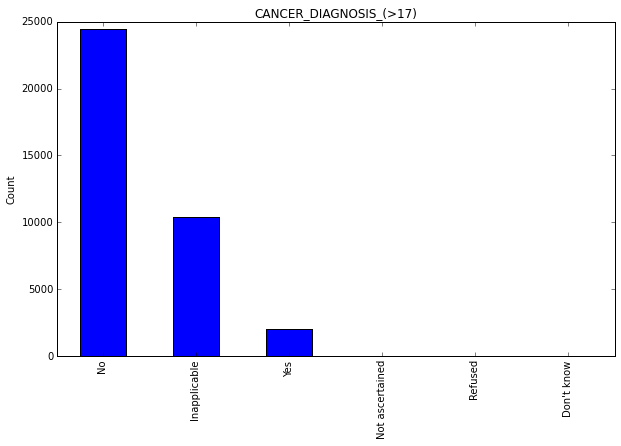

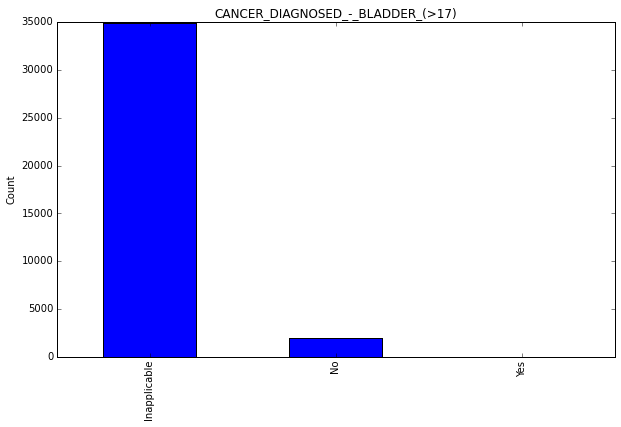

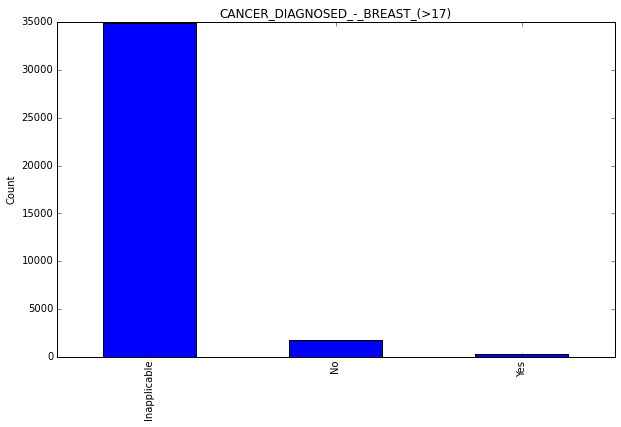

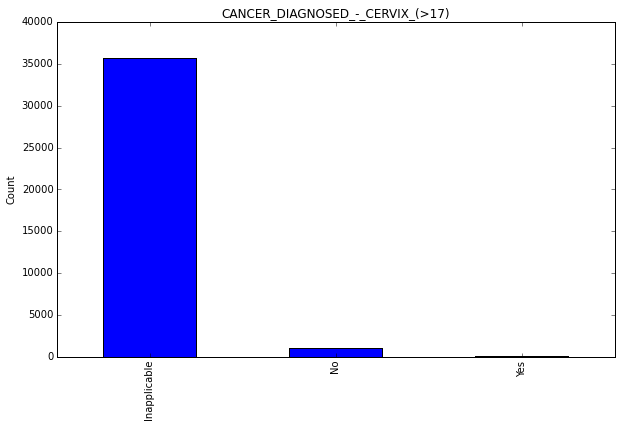

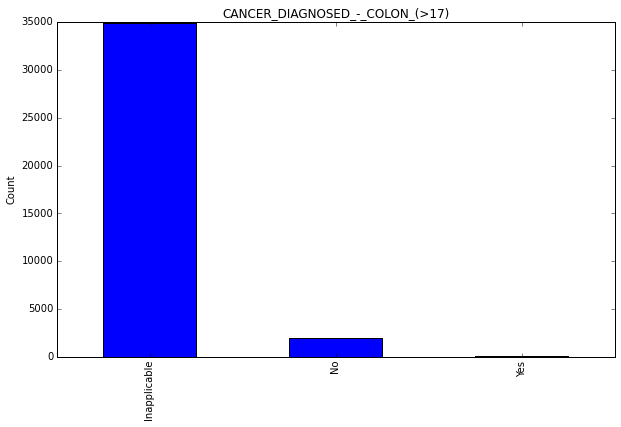

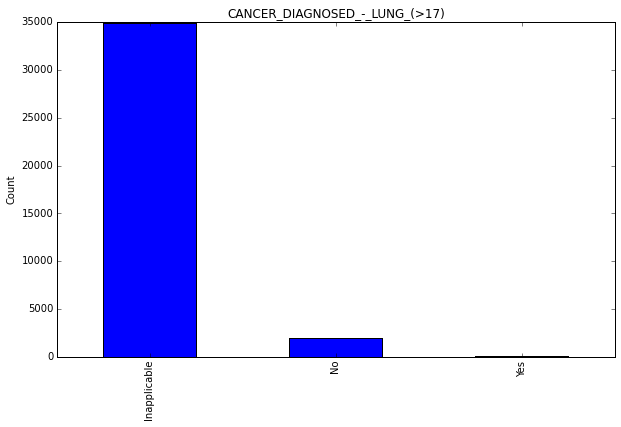

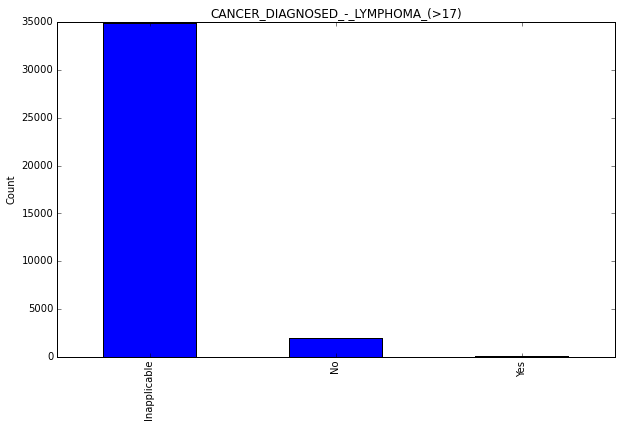

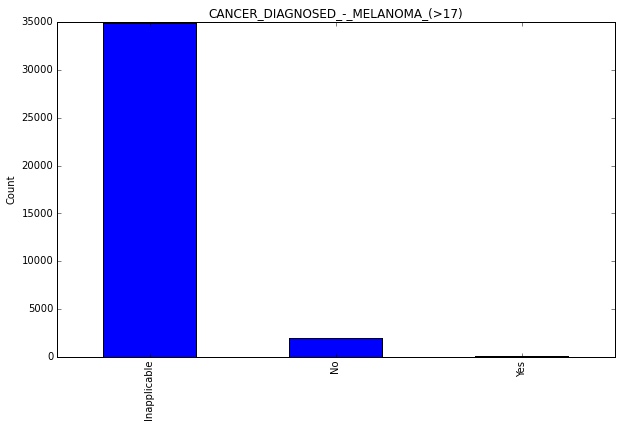

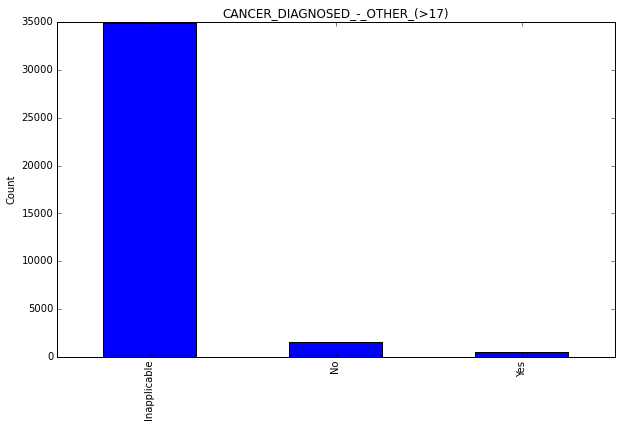

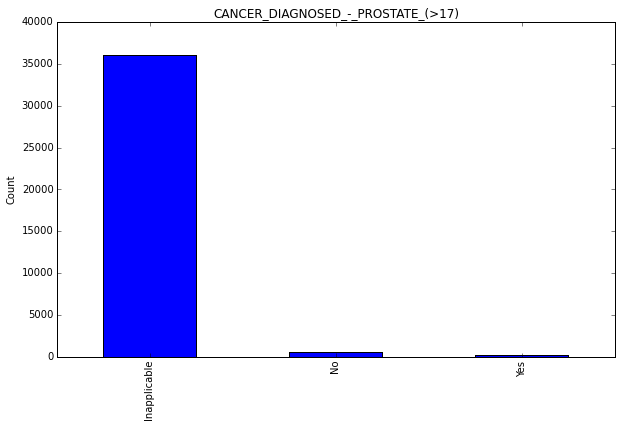

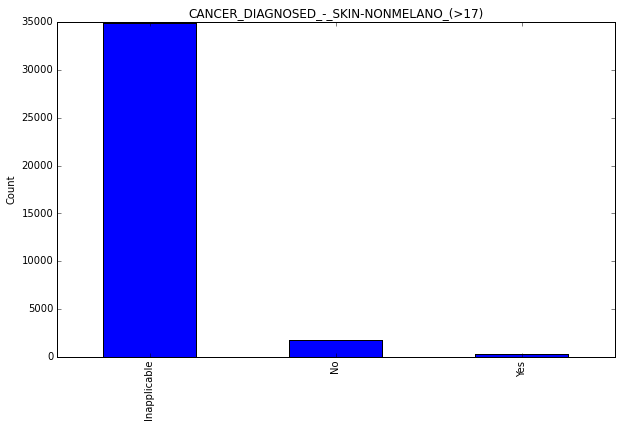

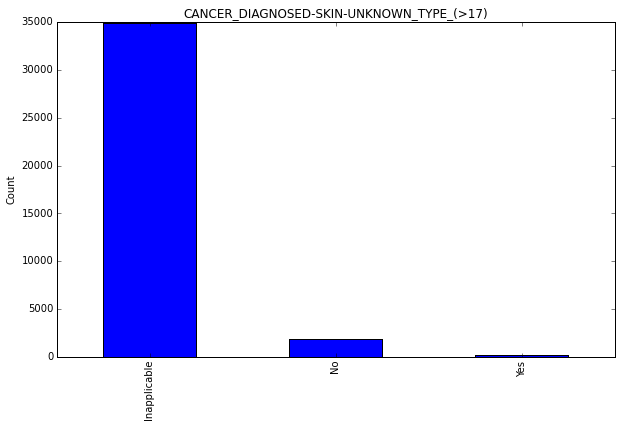

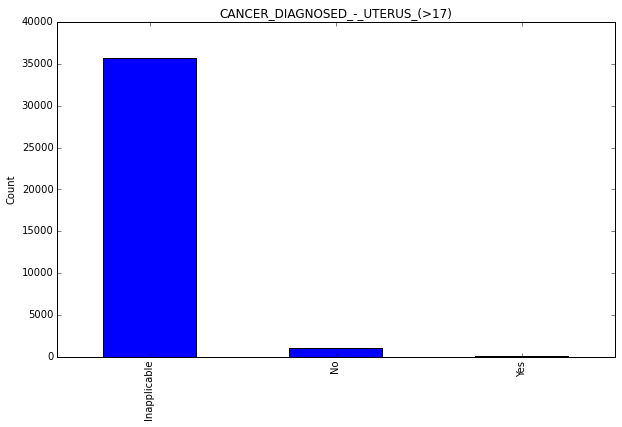

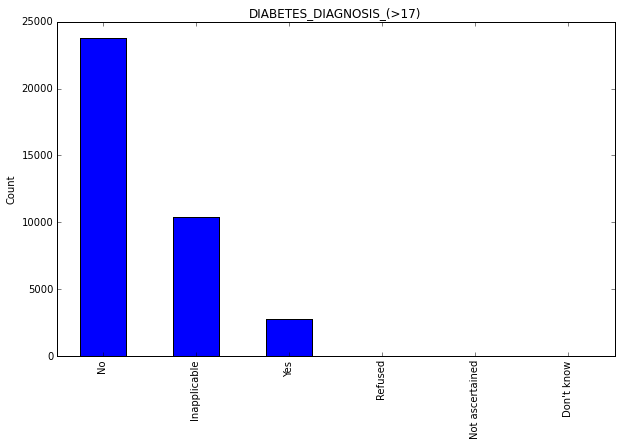

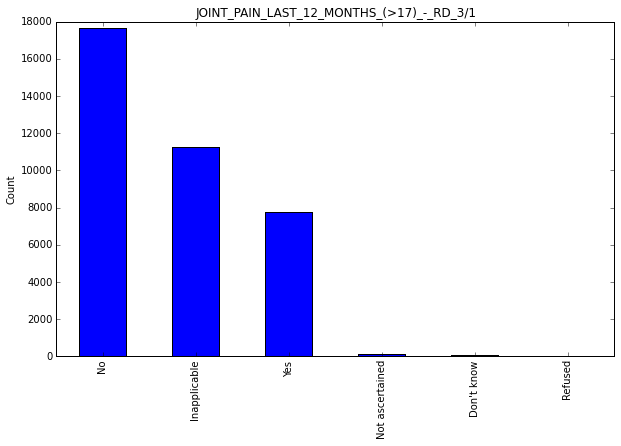

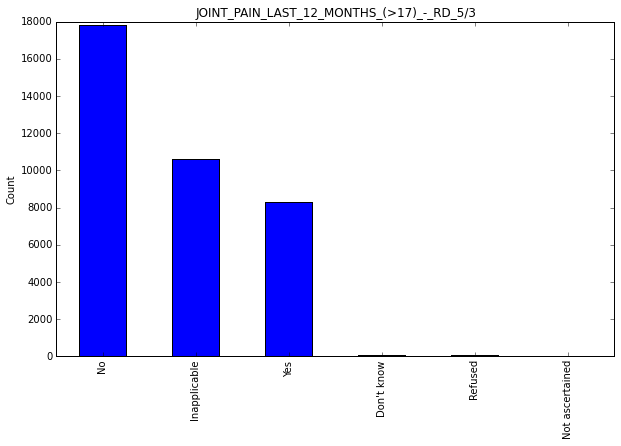

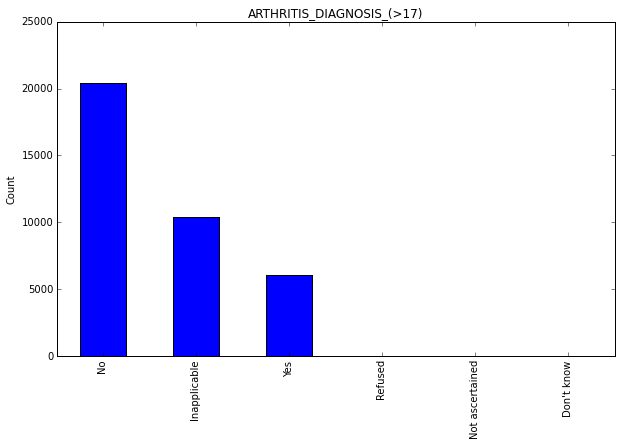

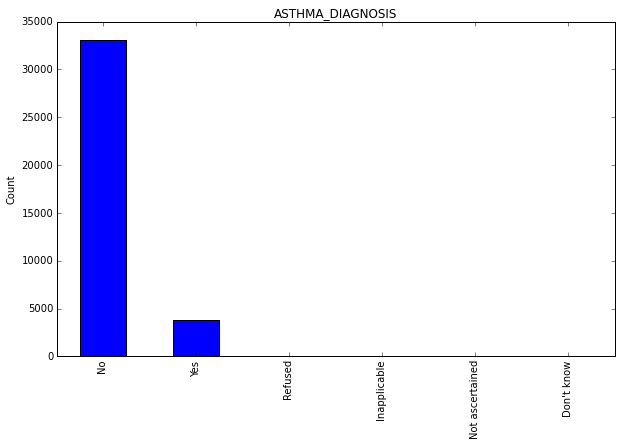

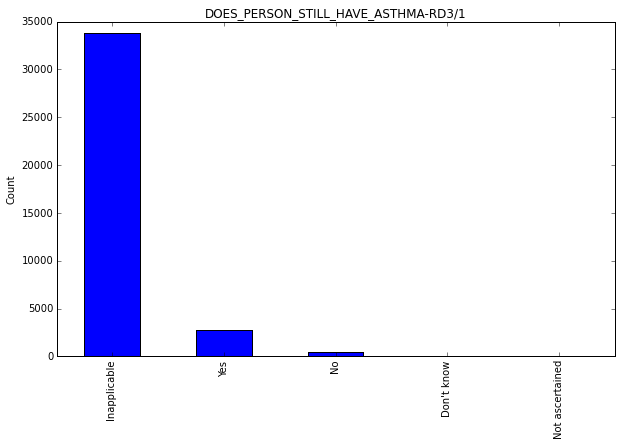

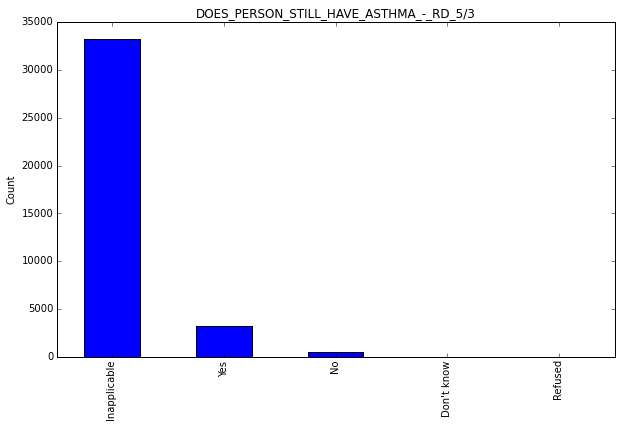

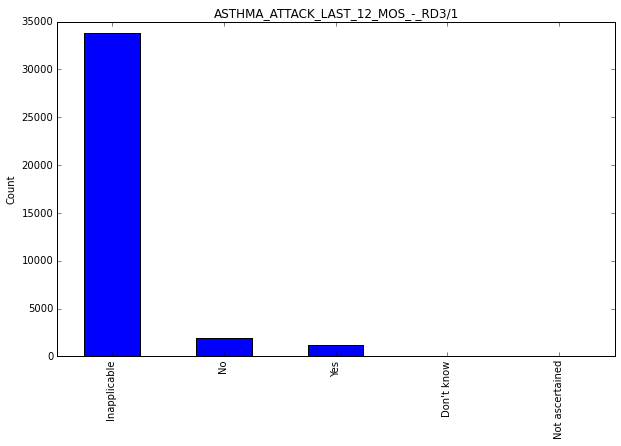

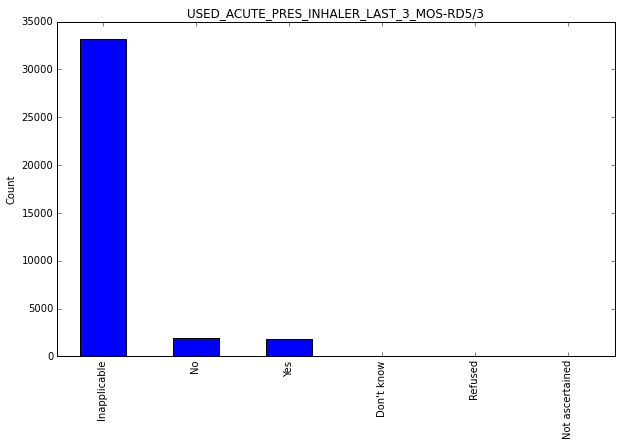

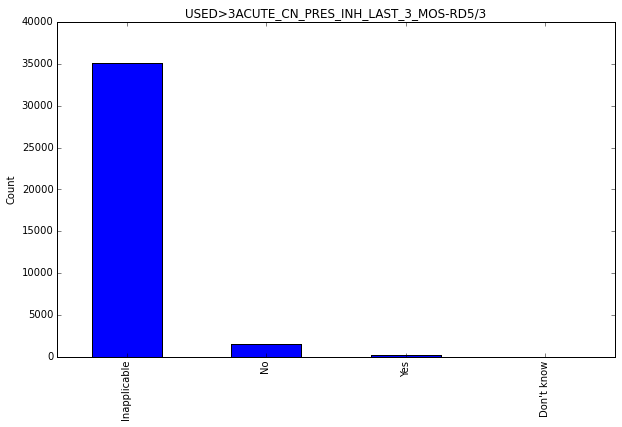

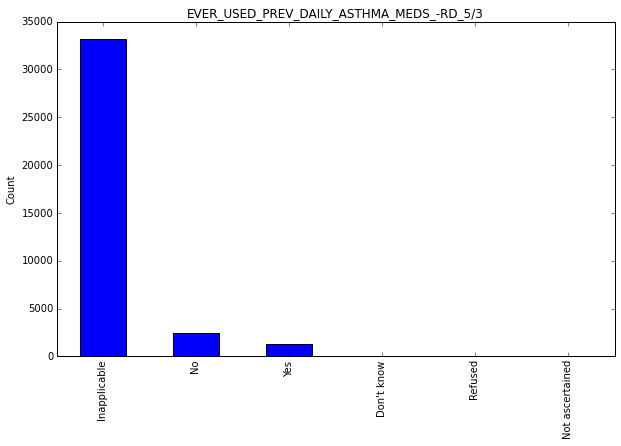

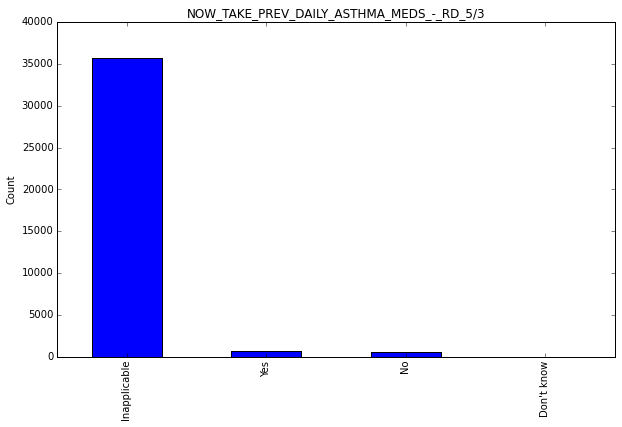

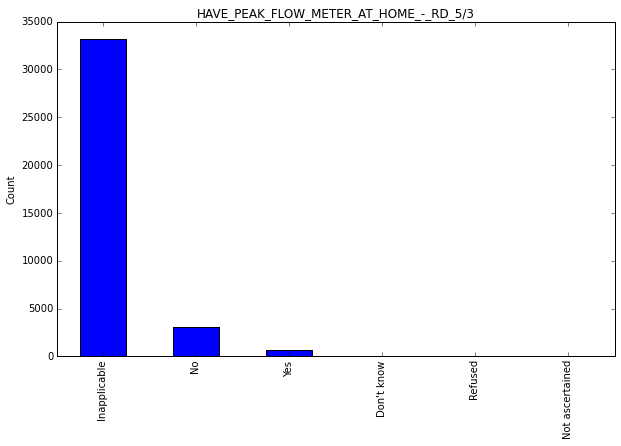

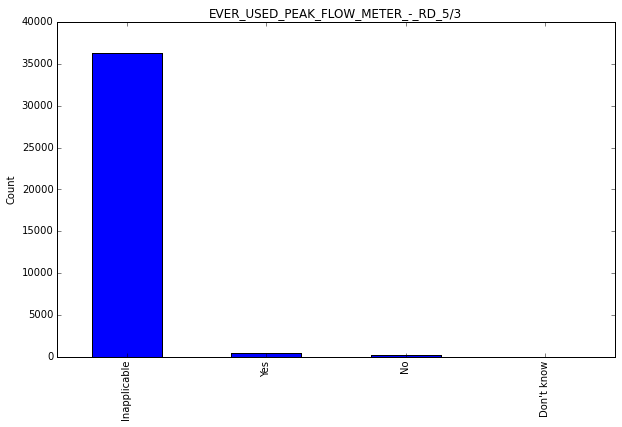

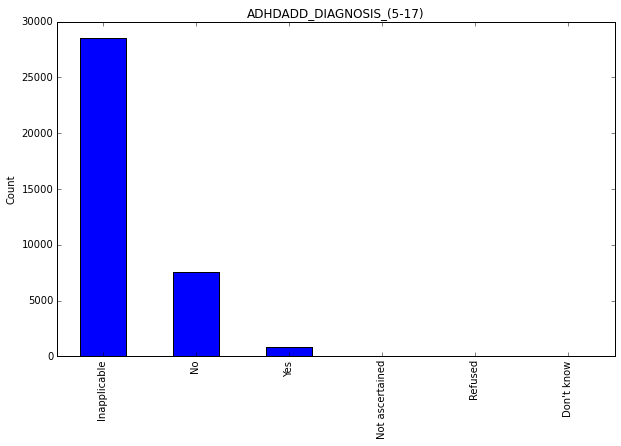

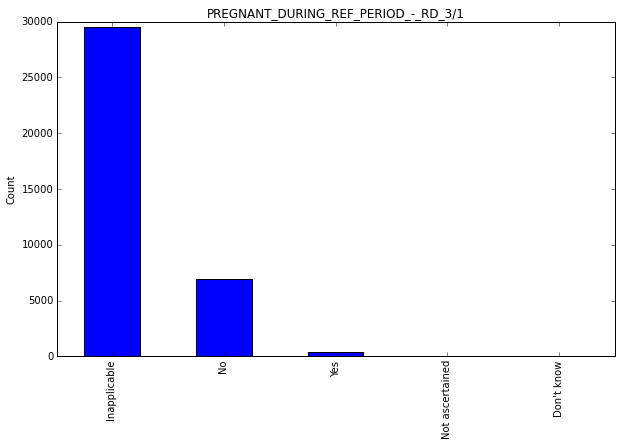

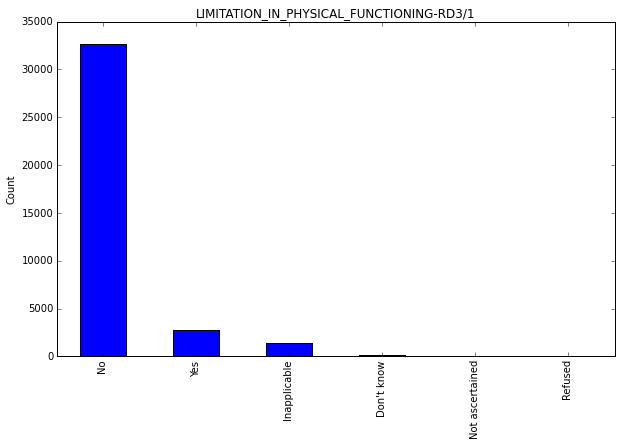

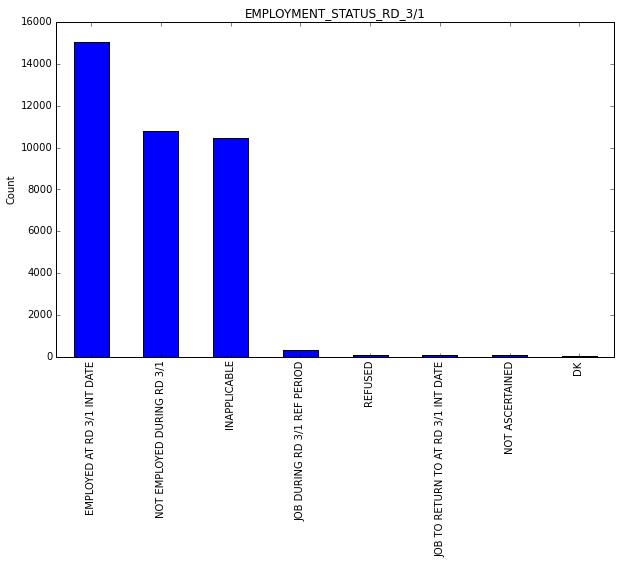

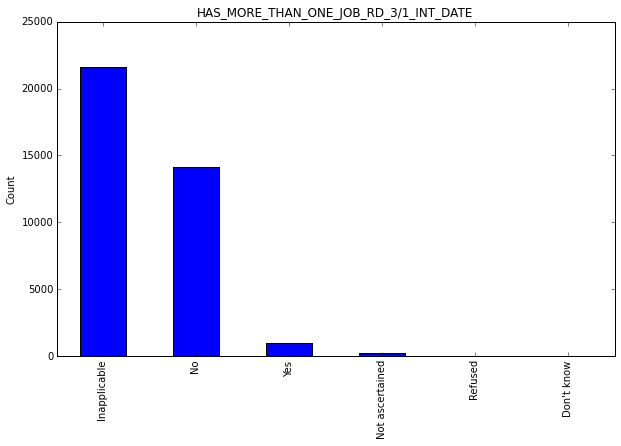

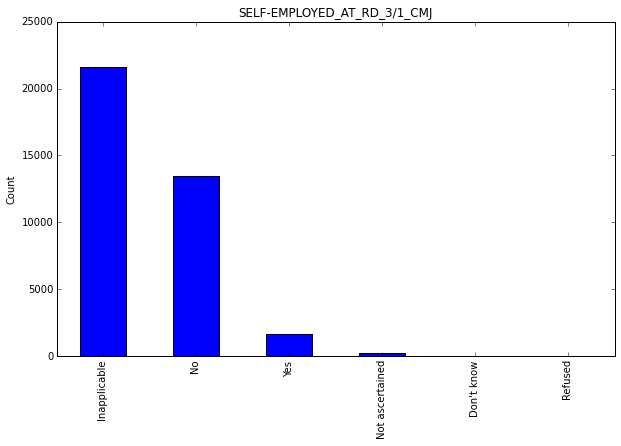

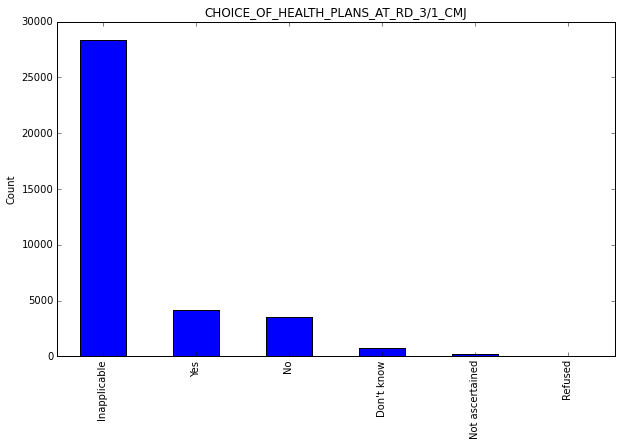

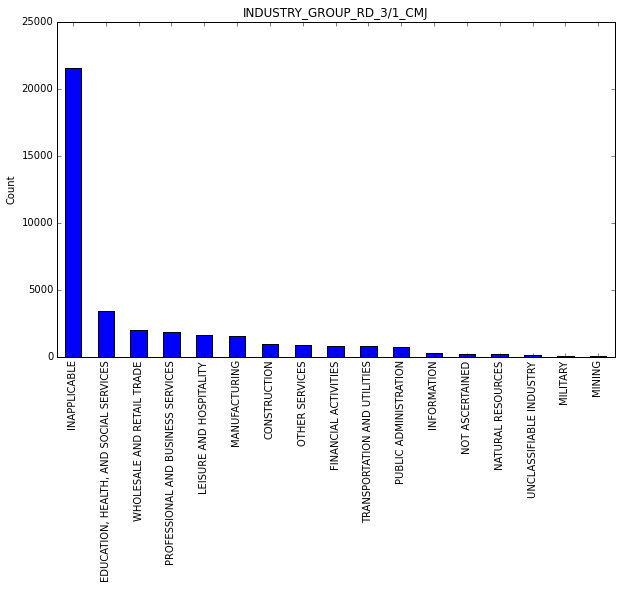

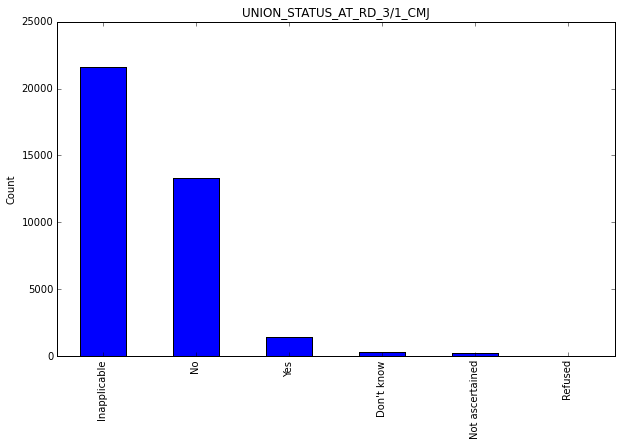

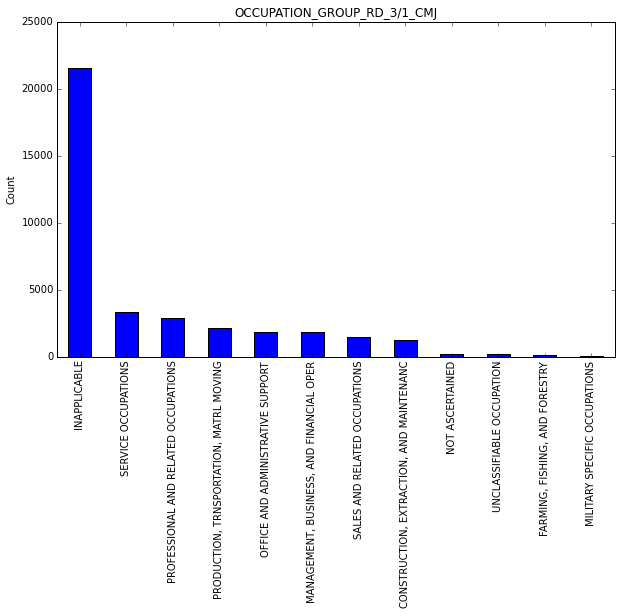

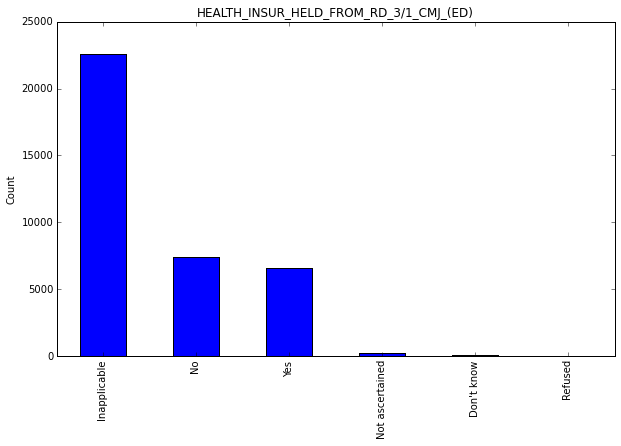

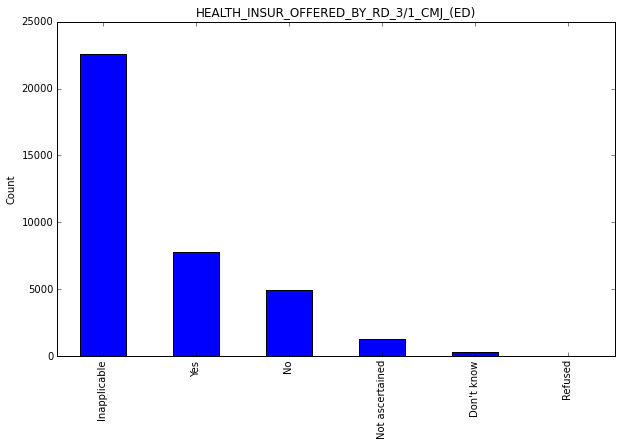

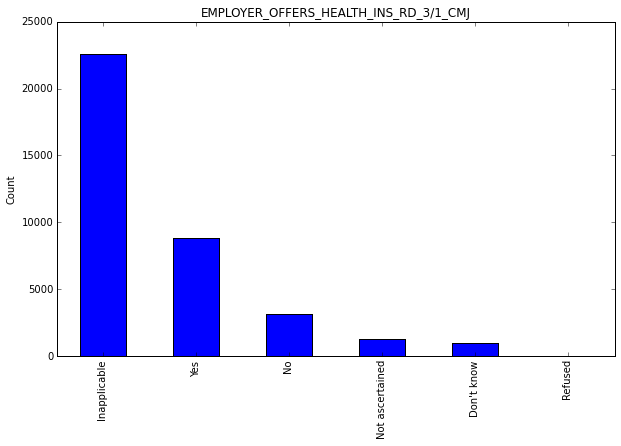

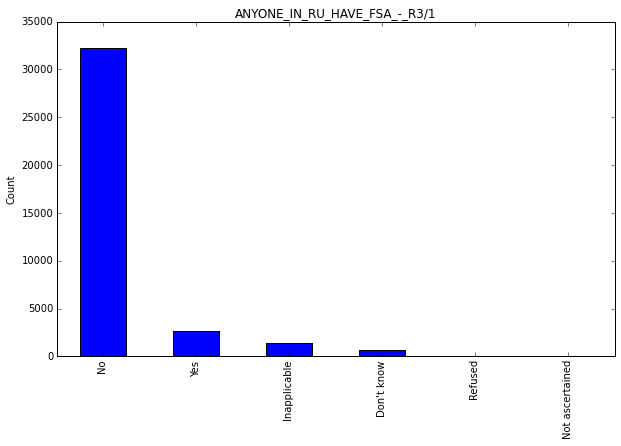

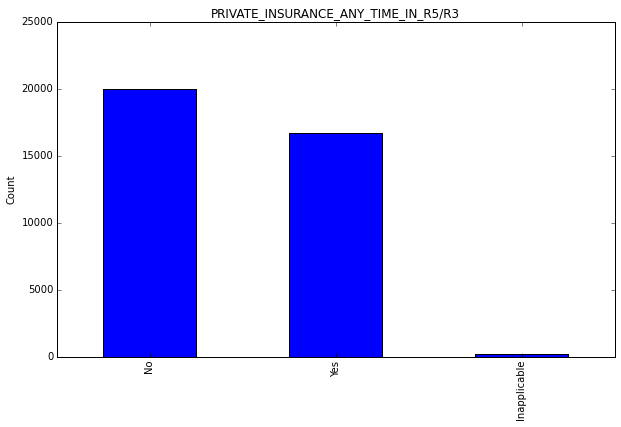

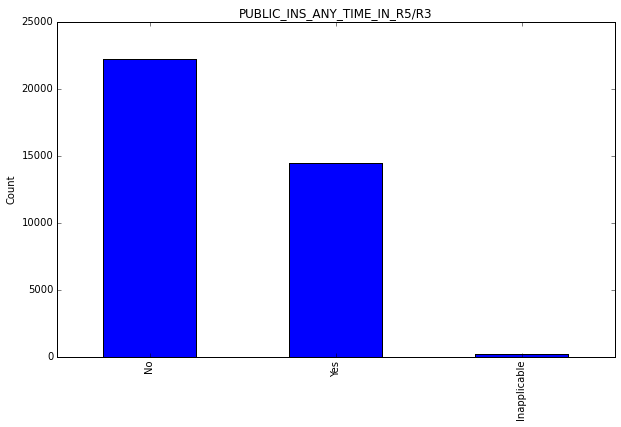

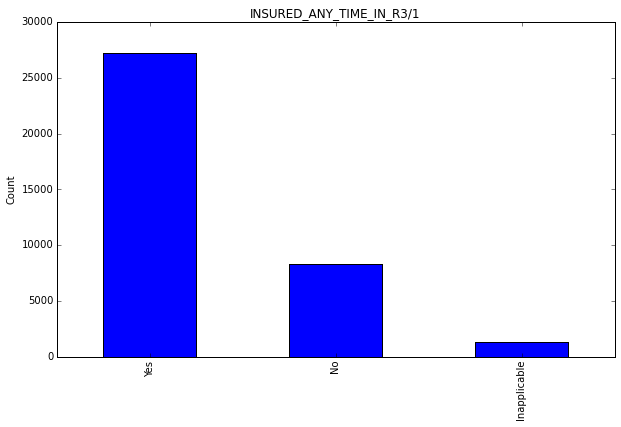

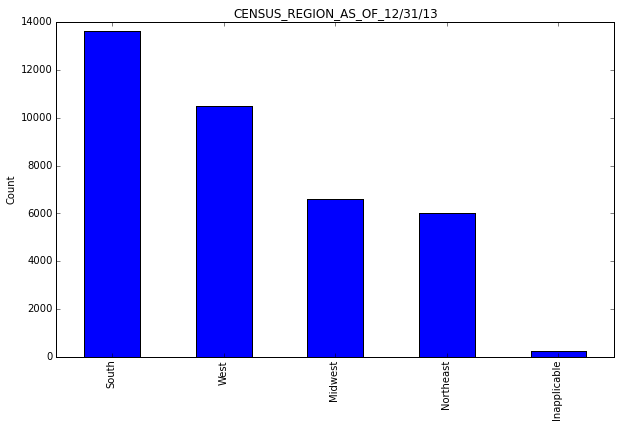

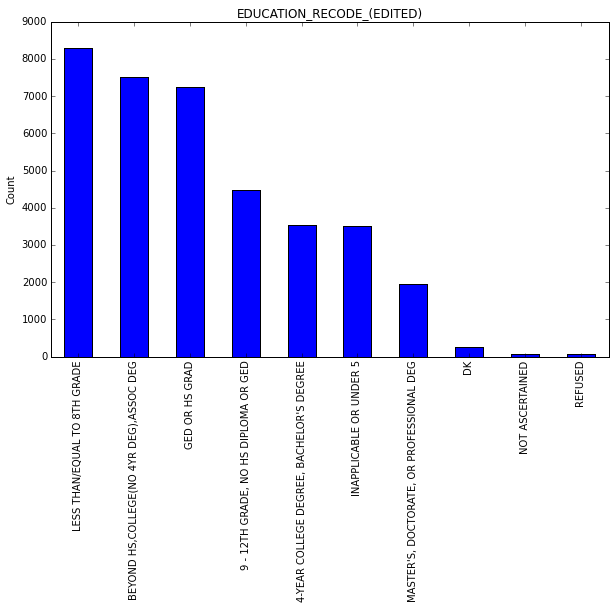

In [34]:
for term in categorical:
    #print(term)
    temp=interpret_vectorized(data,term)
    ax=temp.value_counts().plot(kind="bar",title=term)
    ax.set_ylabel("Count")
    plt.show()

Now that we've had a look at the categorical features, let's take a look at the continuous features.

In [29]:
len(continuous)

27

There are quite a few, but I'm going to try to look at each of them by hand rather than generating them all at once.

In [30]:
continuous

['AGE_AS_OF_12/31/13_(EDITED/IMPUTED)',
 "FAMILY'S_TOTAL_INCOME",
 'ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3',
 'AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE',
 'AGE_OF_DIAGNOSIS-CORONARY_HEART_DISEASE',
 'AGE_OF_DIAGNOSIS-ANGINA',
 'AGE_OF_DIAGNOSIS-HEART_ATTACK(MI)',
 'AGE_OF_DIAGNOSIS-OTHER_HEART_DISEASE',
 'AGE_OF_DIAGNOSIS-STROKE',
 'AGE_OF_DIAGNOSIS-EMPHYSEMA',
 'AGE_OF_DIAGNOSIS-HIGH_CHOLESTEROL',
 'AGE_OF_DIAGNOSIS-DIABETES',
 'AGE_OF_DIAGNOSIS-ARTHRITIS',
 'AGE_OF_DIAGNOSIS-ASTHMA',
 'AGE_OF_DIAGNOSIS-ADHD/ADD',
 'FULL_YEAR_INSURANCE_COVERAGE_STATUS_2013',
 '#_WKS/MON_WOUT_HLTH_INS_PRV_YR-PN_18_ONL',
 'ANY_TIME_COVERAGE_BY_STATE_INS_-_R3/1',
 '#_OFFICE-BASED_PROVIDER_VISITS_13',
 '#_OUTPATIENT_DEPT_PROVIDER_VISITS_13',
 '#_EMERGENCY_ROOM_VISITS_13',
 '#_NIGHTS_IN_HOSP_FOR_DISCHARGES_2013',
 'FINAL_PERSON_WEIGHT_2013',
 'TOTAL_OFFICE-BASED_EXP_13',
 'TOTAL_OUTPATIENT_PROVIDER_EXP_13',
 'TOT_HOSP_IP_FACILITY_+_DR_EXP_13',
 'TOTAL_ER_FACILITY_+_DR_EXP_13']

So there are broadly speaking, continuous variables in the following categories: ages, income levels, time since some event, number of occurences of an event, and total expenditures.

Maybe it's best to look at these variables groupwise.

In [37]:
ages=[term for term in continuous if "AGE_OF" in term or "AGE_AS" in term]
bmi=[term for term in continuous if "ADULT" in term and "BODY" in term and "MASS" in term]
incomes=[term for term in continuous if "FAMILY" in term and "INCOME" in term]
durations=['#_WKS/MON_WOUT_HLTH_INS_PRV_YR-PN_18_ONL']
utilizations=[term for term in continuous if "#" in term]
expenditures=['TOTAL_OFFICE-BASED_EXP_13',
              'TOTAL_OUTPATIENT_PROVIDER_EXP_13',
              'TOT_HOSP_IP_FACILITY_+_DR_EXP_13',
              'TOTAL_ER_FACILITY_+_DR_EXP_13'
             ]
    
    

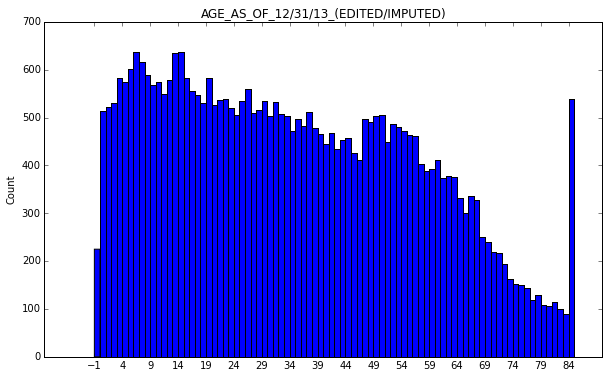

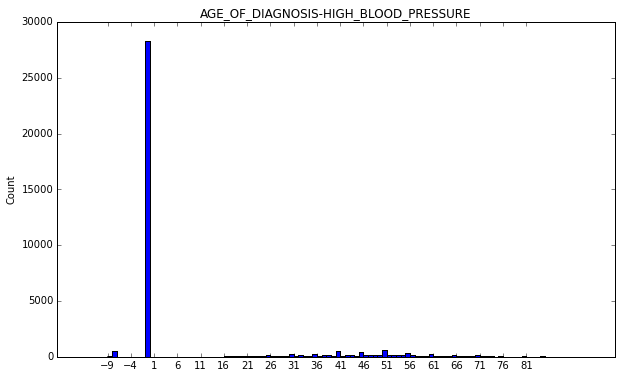

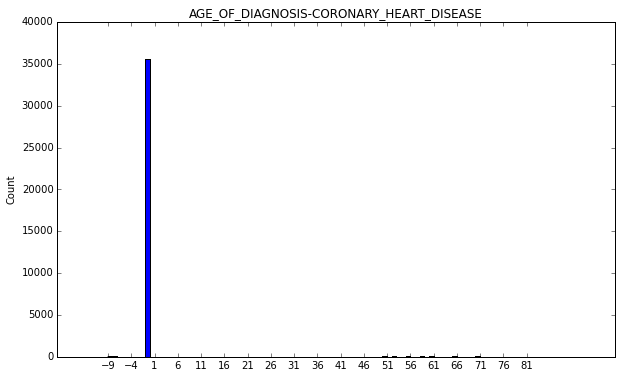

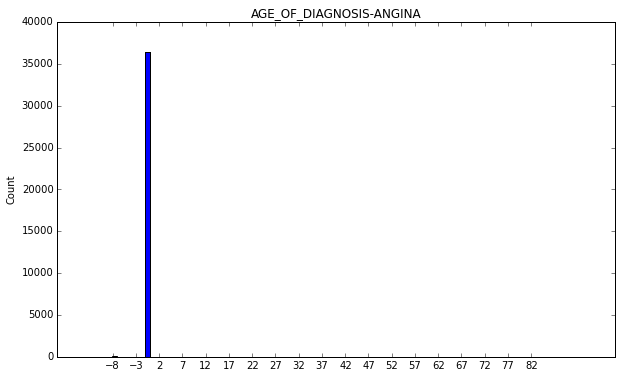

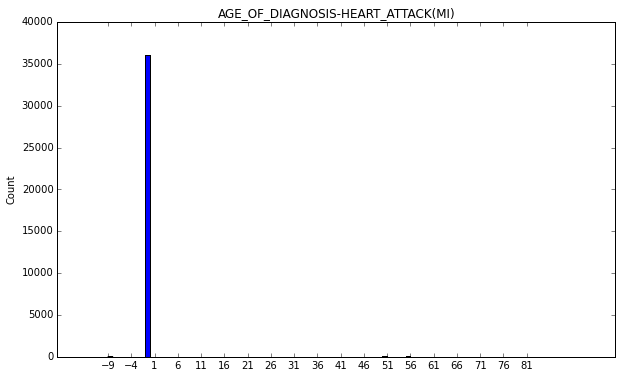

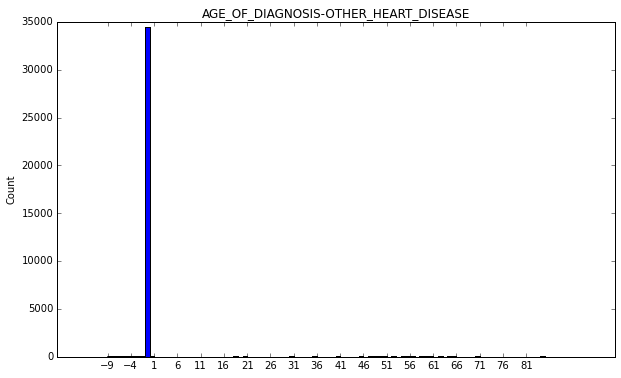

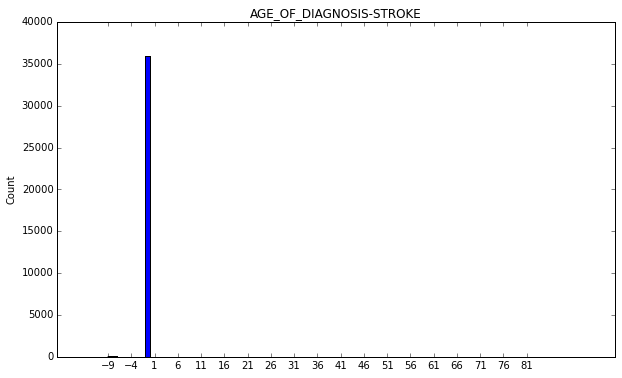

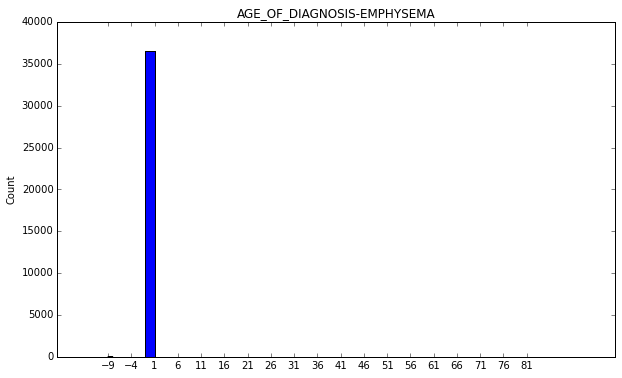

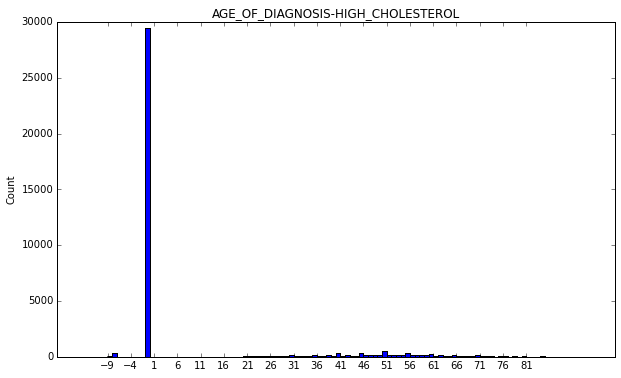

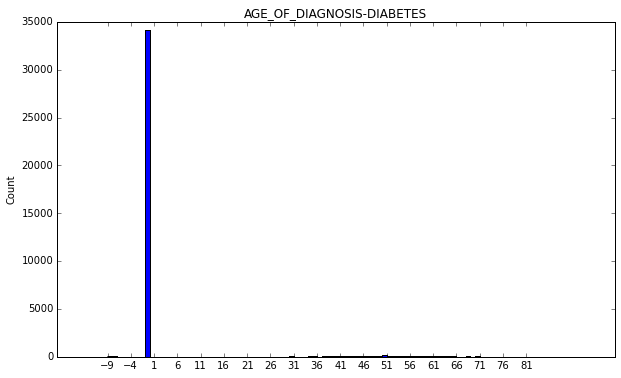

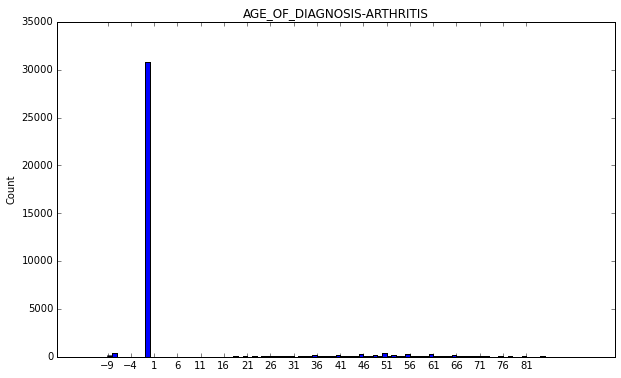

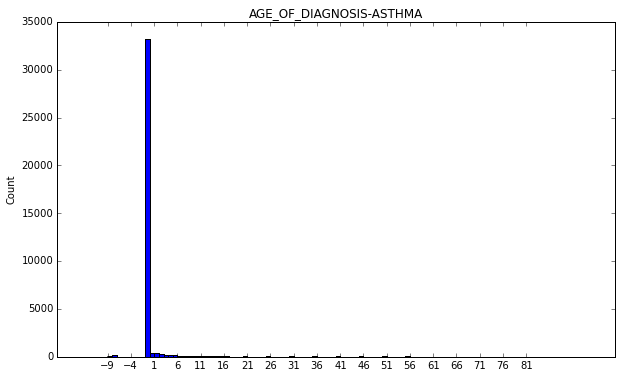

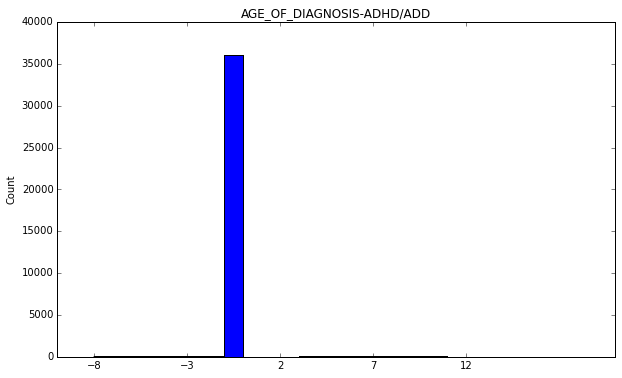

In [36]:
for term in ages:
    bins=sorted(data[term].unique())
    ax=data[term].plot(kind="hist",bins=bins,title=term,xticks=range(min(bins),max(bins),5))
    ax.set_ylabel("Count")
    plt.show()

Since the majority of respondents don't seem to have these chronic conditions, the mass at -1 overwhelms the histograms here. Let's try and zoom in on those people who *do* have chronic condition; for one thing I'm very interested to know if the variation in these variables can help us predict expenses, conditional on having a (or a specific) chronic condition, and it would be good to see if there is variation in the data. 

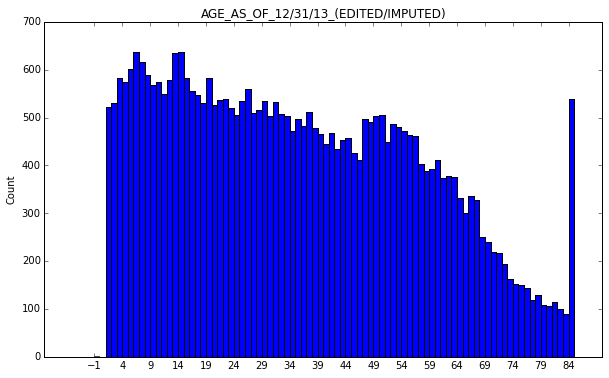

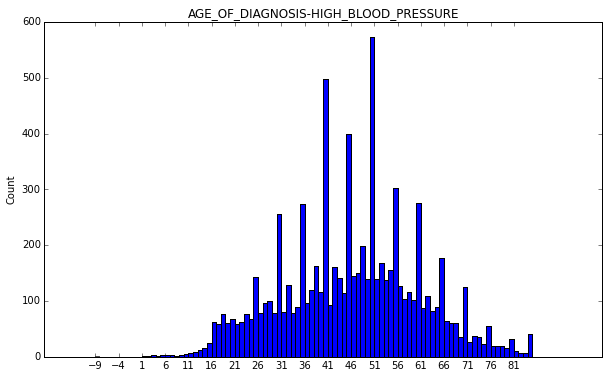

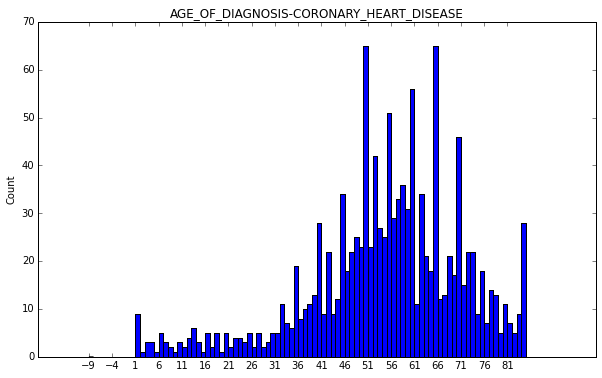

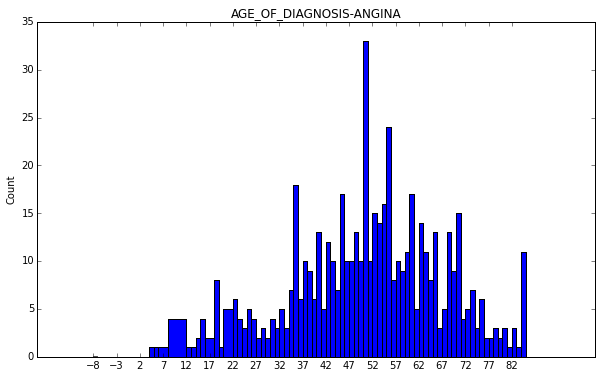

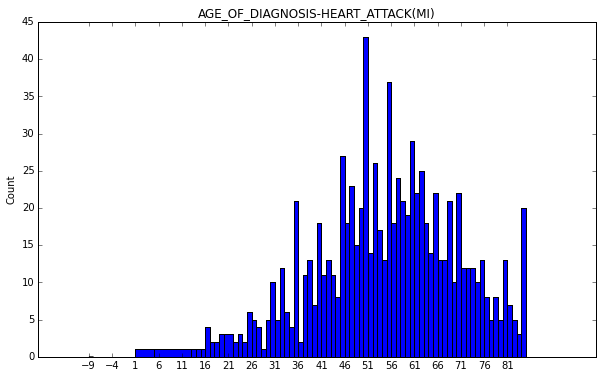

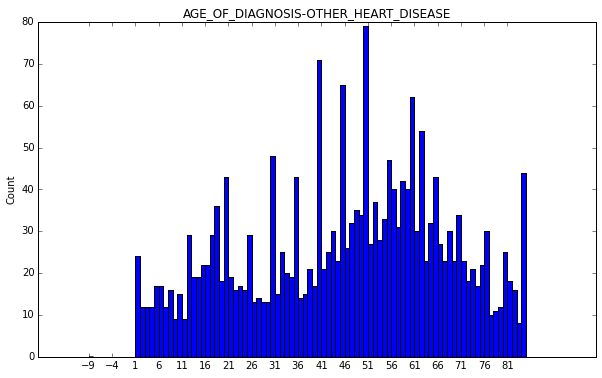

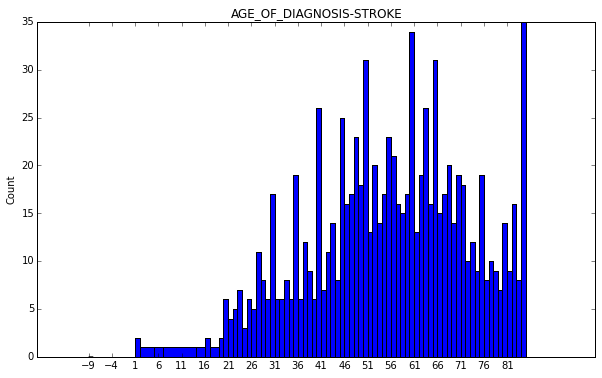

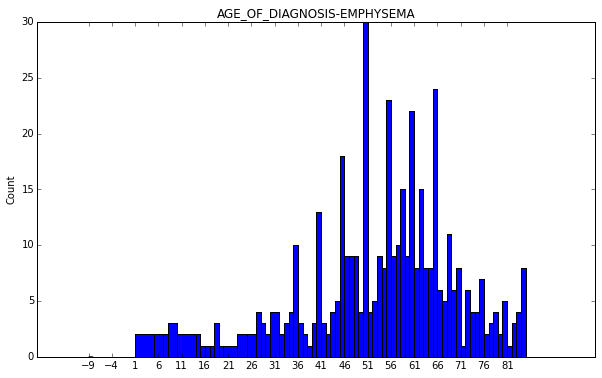

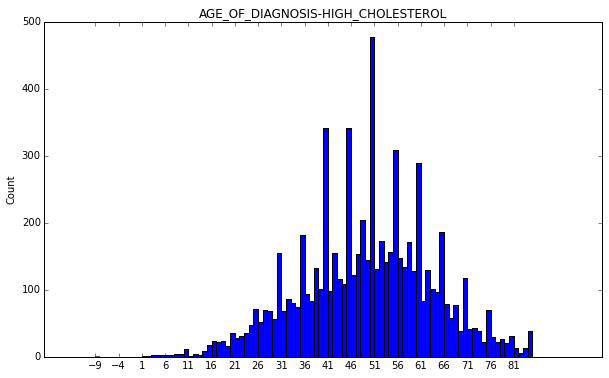

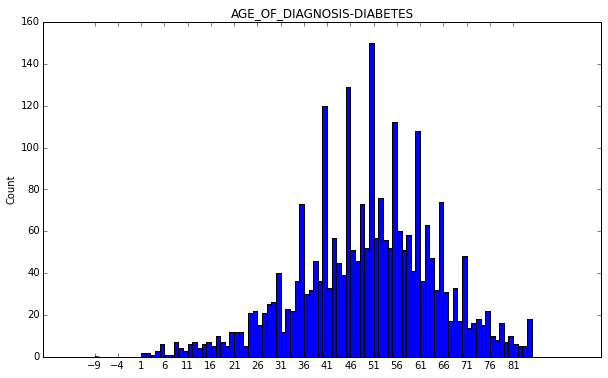

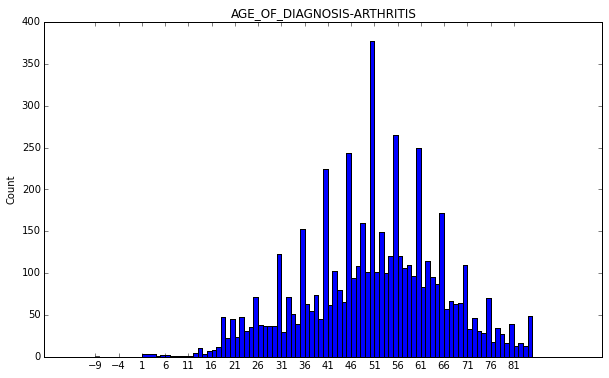

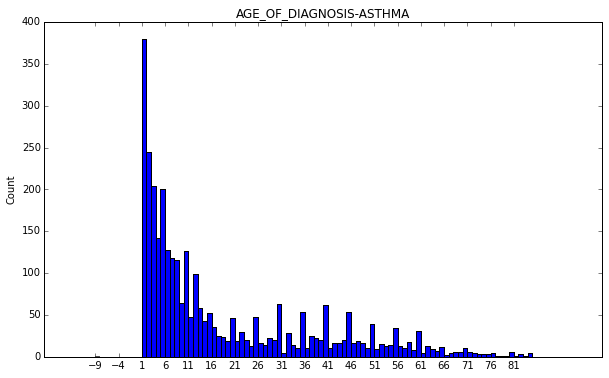

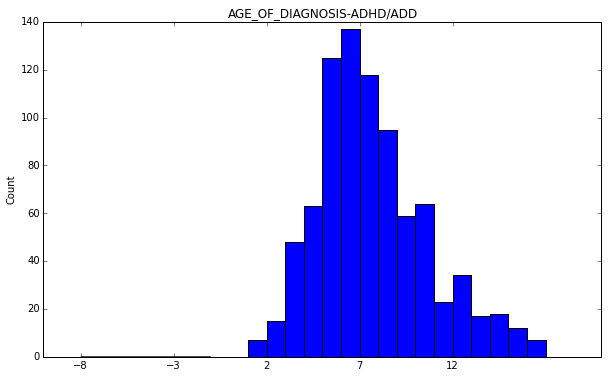

In [38]:
for term in ages:
    bins=sorted(data[term].unique())
    ax=data[term][data[term]>0].plot(kind="hist",bins=bins,title=term,xticks=range(min(bins),max(bins),5))
    ax.set_ylabel("Count")
    plt.show()

Much better!

Now let's move on to the bmi variable.


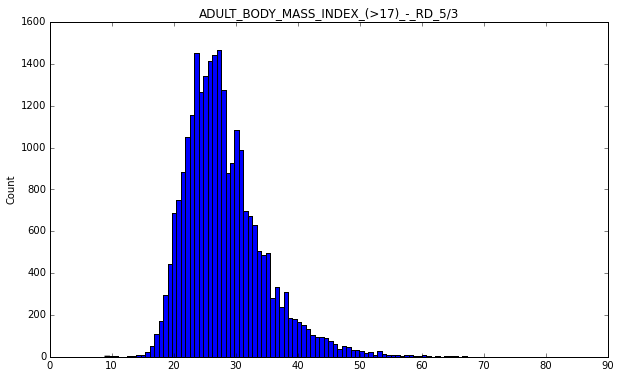

In [16]:
for term in bmi:
    ax=data[term][data[term]>0].plot(kind="hist",bins=100,title=term)
    ax.set_ylabel("Count")
    plt.show()

For reference, here's how to interpret the adult body mass index according to the [CDC guidelines for interpretation](http://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#InterpretedAdults).

Next, on to the income variable:

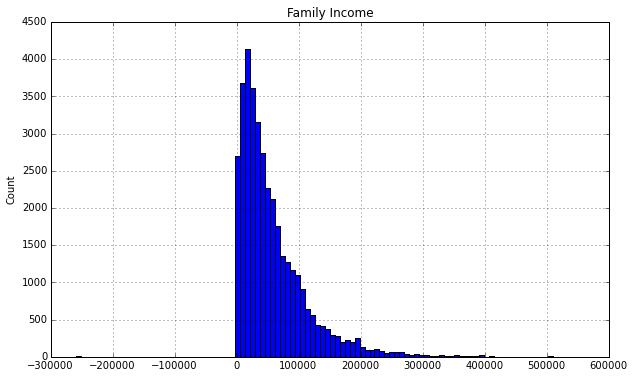

In [17]:
term=incomes[0]
ax=data[term].hist(bins=100)
ax.set_ylabel("Count")
ax.set_title("Family Income")
plt.show()

What's really weird about this is that I see mass below 0; far below 0!

Let's take a closer look.

In [18]:
data[incomes[0]][data[incomes[0]]<0]

54      -258220
55      -258220
4843      -3005
4844      -3005
8200      -1500
27520     -2196
Name: FAMILY'S_TOTAL_INCOME, dtype: int64

Huh. Thankfully there are not many data points here. An important question is how to interpret an income of $-258220$. The smaller values for negative incomes are also interesting - are these reported after something like adjusting for public assistance by the respondents? 

Let's take a look at the survey documentation.

    FAMINC13 contains total family income for each person’s CPS family. Family income was derived by constructing person-level total income comprising annual earnings from wages, salaries, bonuses, tips, commissions; business and farm gains and losses; unemployment and workers’ compensation; interest and dividends; alimony, child support, and other private cash transfers; private pensions, IRA withdrawals, social security, and veterans payments; supplemental security income and cash welfare payments from public assistance, Temporary Assistance for Needy Families, and related programs; gains or losses from estates, trusts, partnerships, S corporations, rent, and royalties; and a small amount of “other” income. Person-level income excluded tax refunds and capital gains. Person-level income totals were then summed over family members, as defined by CPSFAMID, to yield CPS family-level total income (FAMINC13). 
    
None of this tells me what results in large negative values for income. Let me take one last look at whether these data points contain any important information about the predicted features.

In [19]:
data[expenditures][data[incomes[0]]<0]

,TOTAL_OFFICE-BASED_EXP_13,TOTAL_OUTPATIENT_PROVIDER_EXP_13,TOT_HOSP_IP_FACILITY_+_DR_EXP_13,TOTAL_ER_FACILITY_+_DR_EXP_13
54,1467,9,0,534
55,0,0,0,0
4843,0,0,0,0
4844,37,0,0,622
8200,2815,0,0,1146
27520,0,0,0,0


There's nothing particularly outlandish about these numbers. Given this, I think I'm inclined to go by the maxim: "when in doubt, throw it out" when it comes to these data points.

Let's move on to the durations variables. 

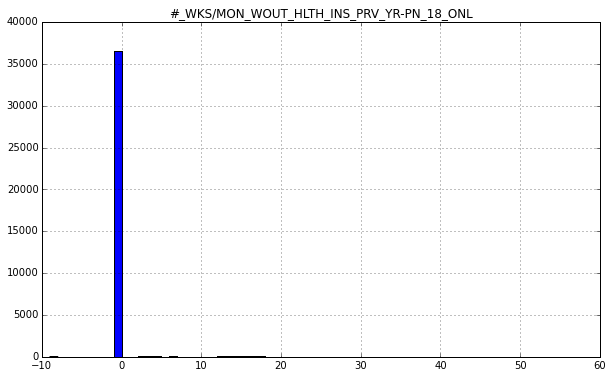

In [20]:
for term in durations:
    bins=sorted(data[term].unique())
    ax=data[term].hist(bins=bins)
    ax.set_title(term)
    plt.show()

Let's take a look at this at only positive values.

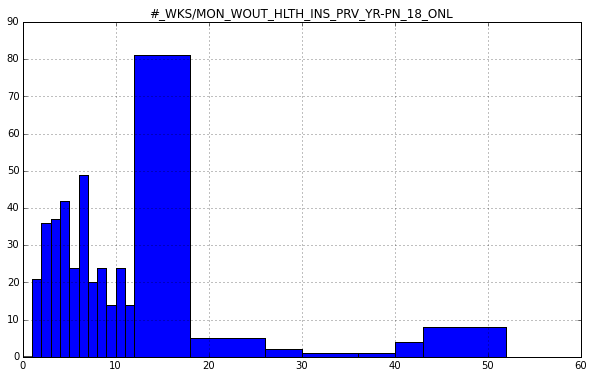

In [21]:
for term in durations:
    bins=sorted(data[term][data[term]>=0].unique())
    ax=data[term][data[term]>0].hist(bins=bins)
    ax.set_title(term)
    plt.show()

This is more interesting, again. There are large masses of people who have been without insurance for less than 26 weeks, and a significant mass of people who have been uninsured almost all year. It will be extremely interesting to compare healthcare expenses for these data points against data points where the respondents have been continuously insured.

Next, the utilization features:

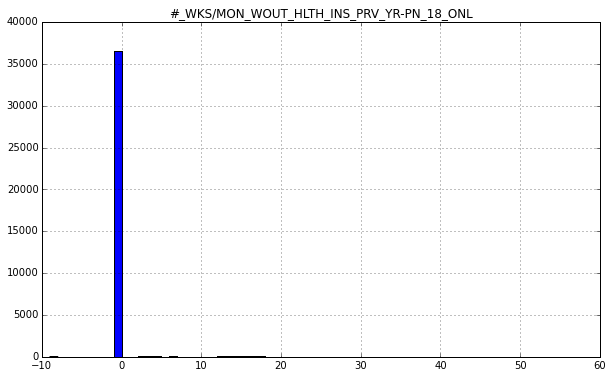

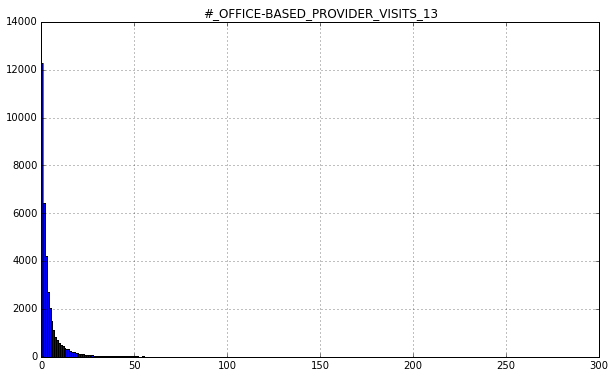

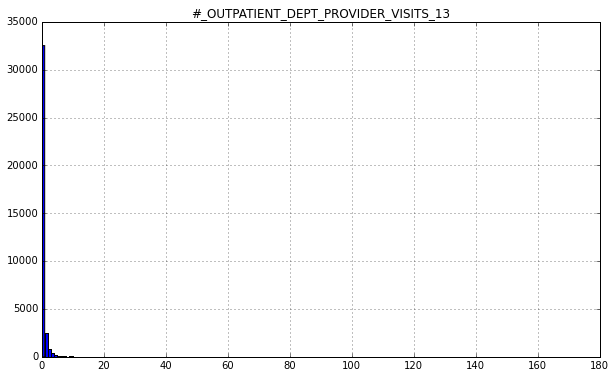

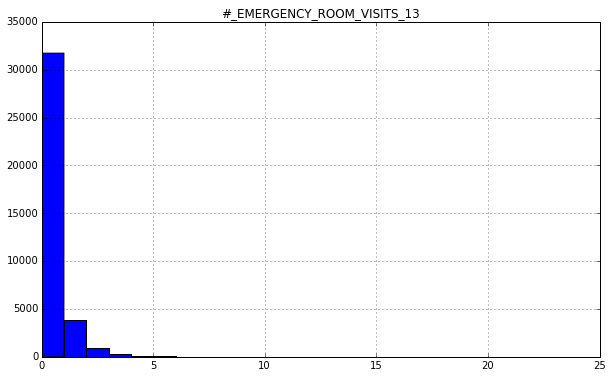

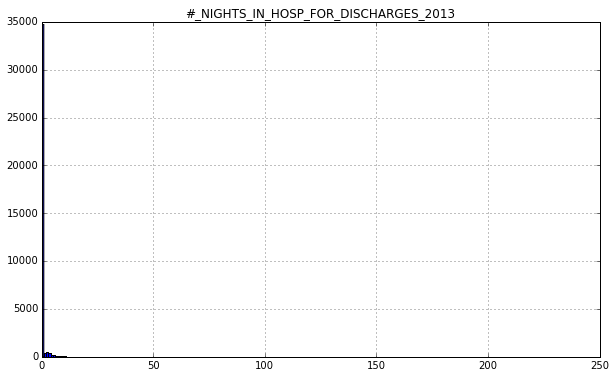

In [22]:
for term in utilizations:
    bins=sorted(data[term].unique())
    ax=data[term].hist(bins=bins)
    ax.set_title(term)
    plt.show()

Let's look at them again, zooming on on the positive values.

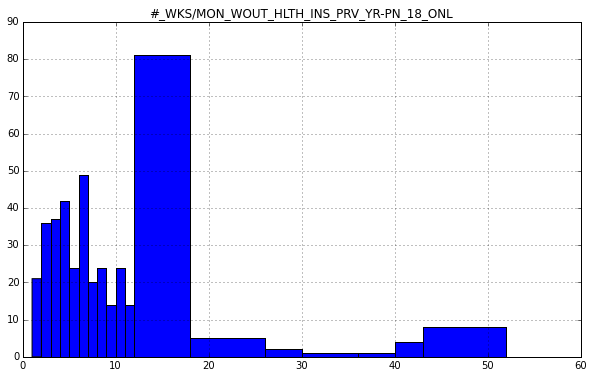

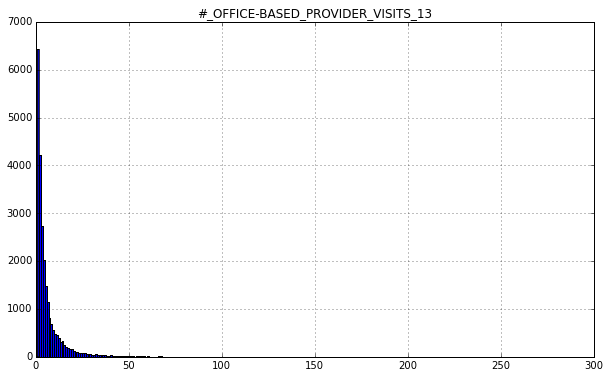

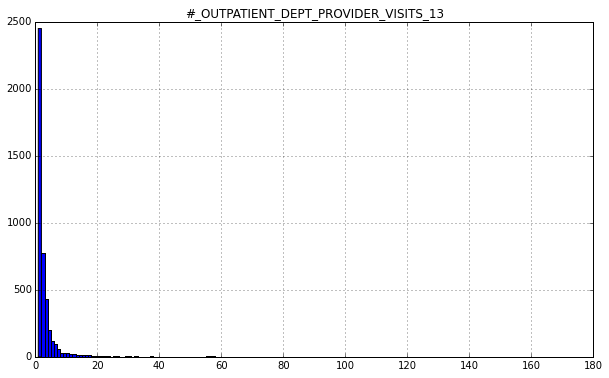

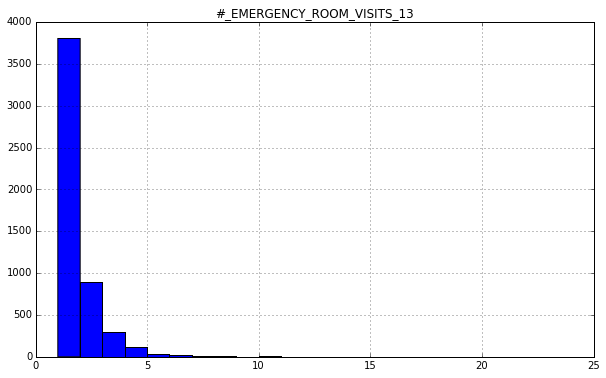

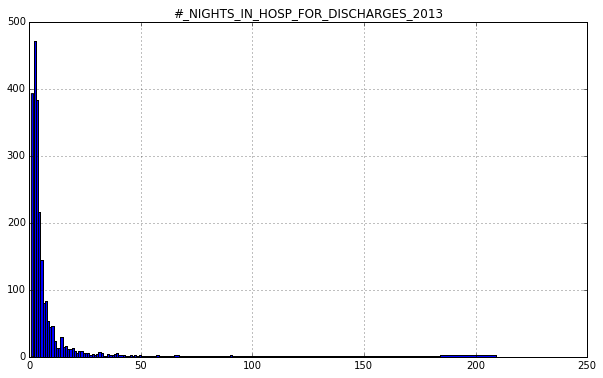

In [23]:
for term in utilizations:
    bins=sorted(data[term][data[term]>0].unique())
    ax=data[term][data[term]>0].hist(bins=bins)
    ax.set_title(term)
    plt.show()

Similar pictures in this case.

We've already looked at the patterns in expenditure, so this takes us to the end of the continuous variables we want to look at.

The next step in the modeling process is to decide whether I want to engineer the features in some way.

Taking another look at the univariate plots above, one immediate problem is clear: while the categorical variables all have sigificant mass in the levels that we care about, the continuous variables (almost by definition) are going to have very little mass for each level of the variable.

For example, in a dataset of about 35,000 people, it stands to reason that relatively few people will have the exact family income level of \$77,189. In fact, for some chosen level - say \$200,367.98 - there may be absolutely no data at that level. This makes the prediction task impossible.

A workaround for this is to transform the continuous explanatory variables by discretizing them into buckets, where the thresholds for the buckets are chosen so that each bucket has a reasonable amount of mass in it, to make the model estimation process more reliable.

For my project, I discretized the continuous variables as in the function below:



In [24]:
def bucket(regressor,value):
    if "ADULT" in regressor and "BODY" in regressor and "MASS" in regressor:
        return int((value>18.5)) + int((value > 24.9)) + int((value>29.9))
    if "AGE_OF_DIAGNOSIS" in regressor:
        return int((value>13)) + int((value>19)) + int((value>25)) + int((value>30)) + int((value>40)) + int((value>50)) + int((value>60)) 
    if "AGE_AS_OF_" in regressor:
        return int((value>12)) + int((value>18)) + int((value>25)) + int((value>30)) + int((value>40)) + int((value>50)) + int((value>60))
    if "PERSON" in regressor and "INCOME" in regressor:
        return int((value>10000)) + int((value>35000)) + int((value>50000)) + int((value>70000)) + int((value>90000)) + int((value>120000)) + int((value>150000)) + int((value>200000))
    if "FAMILY" in regressor and "INCOME" in regressor:
        return int((value>18000)) + int((value>60000)) + int((value>90000)) + int((value>120000)) + int((value>150000)) + int((value>225000)) + int((value>400000)) 
    if "#" in regressor:
        return int((value>4)) + int((value>10)) + int((value>15)) + int((value>20)) + int((value>30)) + int((value>40)) + int((value>50))
    else:
        return value


A few words about these choices. I've discretized:

1. adult body mass index according to the [CDC guidelines for interpretation](http://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#InterpretedAdults). The levels therefore correspond to: 
    1. Underweight
    2. Normal or Healthy Weight
    3. Overweight
    4. Obese
2.  family income according to federal tax brackets, to make user reporting easier, as well as to preserve user privacy when using the model
3. education level according to the following levels: (less than 8th grade, no high school diploma or GED, GED or high school grad, beyond high school including associate's degree, 4-year college degree or bachelor's degree, master's/doctorate/professional degree.
4. age variables according to the thresholds: (12,18,25,30,40,50,60,60+).

Below is the function I use to implement this discretization:
    

In [25]:
def bucketize(data,exog):
    for term in exog:
        data["%s_BUCKET"%term]=data[term].map(lambda x: bucket(term,x))
    return data

Of course, I only need to discretize continuous variables, whereas most of the variables in my list are already categorical.

Let's run the continuous variables through the bucketizing procedure.

In [26]:
data=bucketize(data,continuous)

In [27]:
data.columns

Index(['AGE_AS_OF_12/31/13_(EDITED/IMPUTED)', 'SEX',
       'RACE/ETHNICITY_(EDITED/IMPUTED)',
       'MARITAL_STATUS-12/31/13_(EDITED/IMPUTED)', 'FAMILY'S_TOTAL_INCOME',
       'ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3',
       'HIGH_BLOOD_PRESSURE_DIAG_(>17)', 'CORONARY_HRT_DISEASE_DIAG_(>17)',
       'AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE',
       'MULT_DIAG_HIGH_BLOOD_PRESS_(>17)', 
       ...
       'ANY_TIME_COVERAGE_BY_STATE_INS_-_R3/1_BUCKET',
       '#_OFFICE-BASED_PROVIDER_VISITS_13_BUCKET',
       '#_OUTPATIENT_DEPT_PROVIDER_VISITS_13_BUCKET',
       '#_EMERGENCY_ROOM_VISITS_13_BUCKET',
       '#_NIGHTS_IN_HOSP_FOR_DISCHARGES_2013_BUCKET',
       'FINAL_PERSON_WEIGHT_2013_BUCKET', 'TOTAL_OFFICE-BASED_EXP_13_BUCKET',
       'TOTAL_OUTPATIENT_PROVIDER_EXP_13_BUCKET',
       'TOT_HOSP_IP_FACILITY_+_DR_EXP_13_BUCKET',
       'TOTAL_ER_FACILITY_+_DR_EXP_13_BUCKET'],
      dtype='object', length=114)

Let's save this to disk for the moment, so we can pick up on our analysis later without running all that code again.

In [28]:
data.to_pickle("/home/soumya/research/insight/insight_project/modeling/data/dsm_data_cleaned_bucketized.pkl")